# Importing Python libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingRegressor
from prettytable import PrettyTable
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> TSLA Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [3]:
data = yf.Ticker("TSLA")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head()

Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
2011-07-21  5.782  5.832  5.620  5.740  5057500          0           0.0
2011-07-22  5.740  5.908  5.710  5.858  2917500          0           0.0
2011-07-25  5.802  5.850  5.688  5.698  3366500          0           0.0
2011-07-26  5.662  5.754  5.594  5.600  3803000          0           0.0
2011-07-27  5.700  5.700  5.502  5.528  4792500          0           0.0

### Five last records of data

In [5]:
data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21297100   
2021-07-20  651.989990  662.390015  640.500000  660.500000  15442700   
2021-07-21  659.609985  664.859924  650.290100  653.342407   9591150   

            Dividends  Stock Splits  
Date                                 
2021-07-15          0           0.0  
2021-07-16          0           0.0  
2021-07-19          0           0.0  
2021-07-20          0           0.0  
2021-07-21          0           0.0

### Coloumns/features in data

In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data))

lenght of data is 2517


### Shape of data

In [8]:
data.shape

(2517, 7)

### Data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-07-21 to 2021-07-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   int64  
 6   Stock Splits  2517 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 157.3 KB


### Data types of all coloumns

In [10]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

### Checking missing Values

In [11]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [12]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [13]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [14]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [15]:
data.describe()

Open         High          Low        Close        Volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean    101.653233   103.841135    99.268664   101.686761  3.429497e+07   
std     172.643888   176.447881   168.275826   172.649722  2.883000e+07   
min       4.386000     4.622000     4.300000     4.390000  1.198000e+06   
25%      35.279999    36.118000    34.529999    35.548000  1.633980e+07   
50%      47.493999    48.568001    46.841999    47.703999  2.750800e+07   
75%      65.917999    67.274002    64.963997    66.185997  4.284700e+07   
max     891.380005   900.400024   871.599976   883.090027  3.046940e+08   

       Dividends  Stock Splits  
count     2517.0   2517.000000  
mean         0.0      0.001986  
std          0.0      0.099662  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000

### Data Correlation

In [16]:
aa=data[['Close','Open','Low','High','Volume']]
rets=aa.pct_change()
cor=rets.corr(method='pearson')
cor

Close      Open       Low      High    Volume
Close   1.000000  0.356811  0.702142  0.753383  0.054325
Open    0.356811  1.000000  0.733914  0.719067  0.030194
Low     0.702142  0.733914  1.000000  0.727268 -0.165256
High    0.753383  0.719067  0.727268  1.000000  0.264435
Volume  0.054325  0.030194 -0.165256  0.264435  1.000000

<AxesSubplot:>

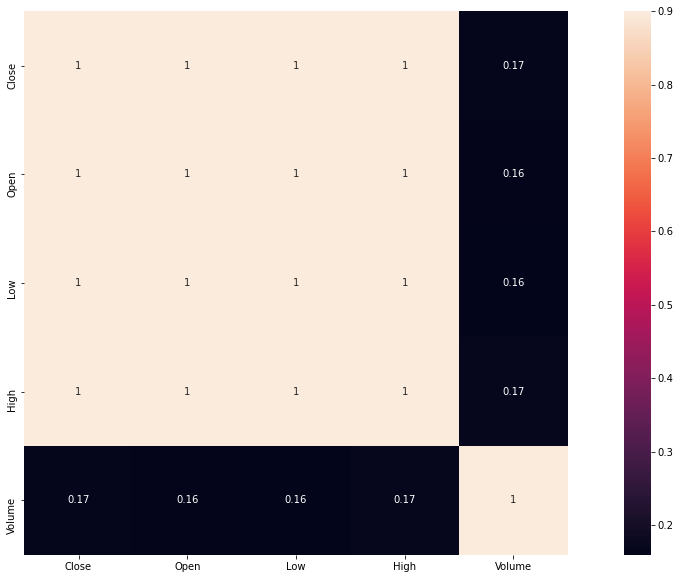

In [17]:
corrmat = aa.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True, annot = True)

### Correlation with Close 

<AxesSubplot:title={'center':'Correlation of Close'}>

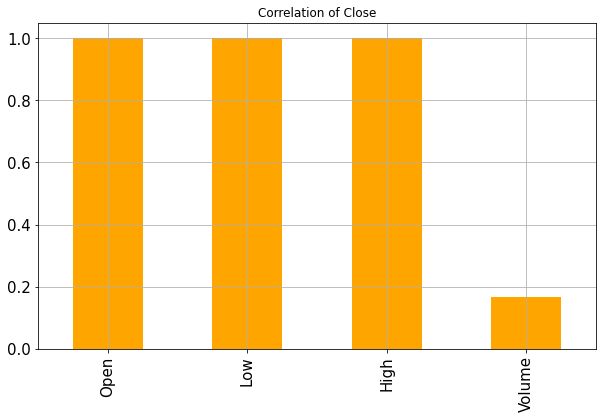

In [18]:
a = aa.drop(columns=['Close'], axis=1)
a.corrwith(aa['Close']).plot.bar(
                figsize = (10, 6), title = "Correlation of Close", fontsize = 15,
                rot = 90, grid = True, color='orange')

### Spliting date into day, month and year

In [19]:
data['date'] = data.index
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Year'] = data['date'].dt.year

### Close price with respect to year 

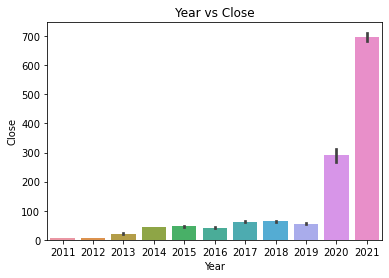

In [20]:
sns.barplot(x='Year', y='Close', data=data).set(title='Year vs Close')
plt.show()

### Close price with respect to Month 

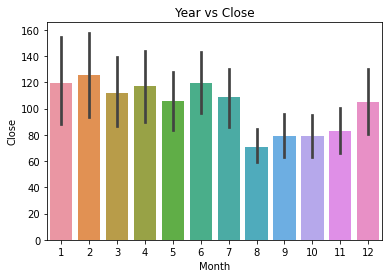

In [21]:
sns.barplot(x='Month', y='Close', data=data).set(title='Year vs Close')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

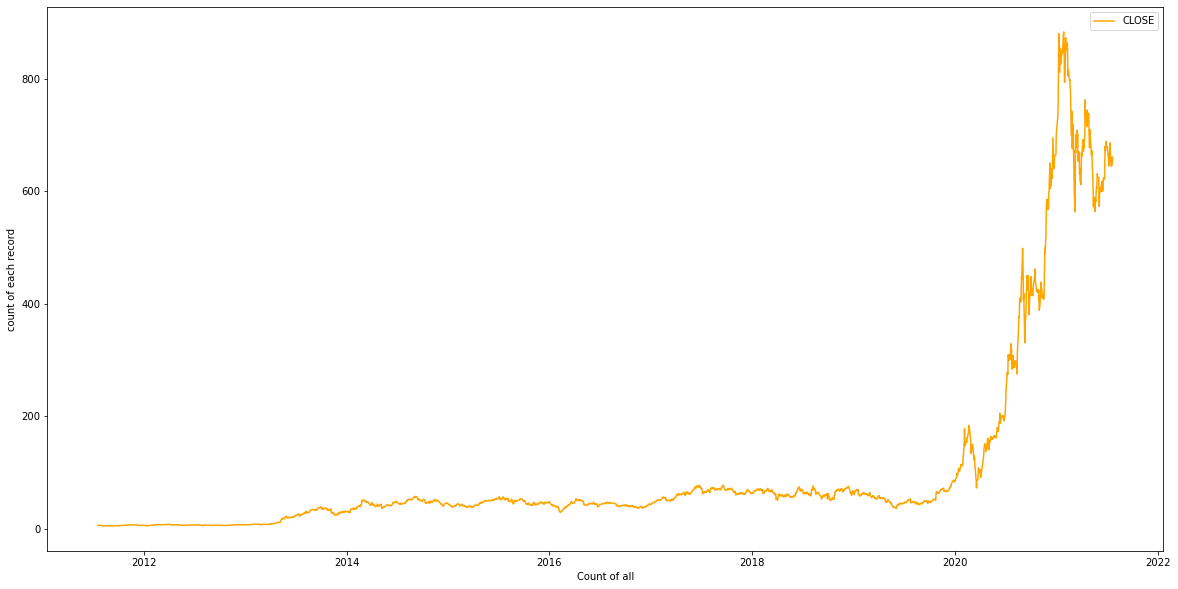

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data.index, data['Close'].values,color='orange',label='CLOSE')
plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [23]:
def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [24]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

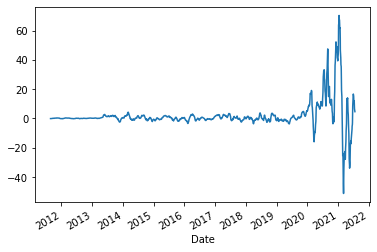

In [25]:
data['MACD'].plot()

### Moving average features

In [26]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [28]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [29]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [30]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [31]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [32]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [33]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [34]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [35]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [36]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [37]:
data=data.replace(np.NaN, 0)
data

Open        High         Low       Close    Volume  \
Date                                                                   
2011-07-21    5.782000    5.832000    5.620000    5.740000   5057500   
2011-07-22    5.740000    5.908000    5.710000    5.858000   2917500   
2011-07-25    5.802000    5.850000    5.688000    5.698000   3366500   
2011-07-26    5.662000    5.754000    5.594000    5.600000   3803000   
2011-07-27    5.700000    5.700000    5.502000    5.528000   4792500   
...                ...         ...         ...         ...       ...   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21297100   
2021-07-20  651.989990  662.390015  640.500000  660.500000  15442700   
2021-07-21  659.609985  664.859924  650.290100  653.342407   9591150   

            Dividends  Stock Splits       date  Month  Day  ...  \
Date                                                        ...   
2011-07-21          0           0.0 2011-07-21      7   21  ...   
2011-07-22          0           0.0 2011-07-22      7   22  ...   
2011-07-25          0           0.0 2011-07-25      7   25  ...   
2011-07-26          0           0.0 2011-07-26      7   26  ...   
2011-07-27          0           0.0 2011-07-27      7   27  ...   
...               ...           ...        ...    ...  ...  ...   
2021-07-15          0           0.0 2021-07-15      7   15  ...   
2021-07-16          0           0.0 2021-07-16      7   16  ...   
2021-07-19          0           0.0 2021-07-19      7   19  ...   
2021-07-20          0           0.0 2021-07-20      7   20  ...   
2021-07-21          0           0.0 2021-07-21      7   21  ...   

            Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date                                                                   
2011-07-21               0.0    0.000000   0.000000   0.000000     0   
2011-07-22               0.0    0.000000   0.076000  -0.090000     0   
2011-07-25               0.0    0.000000  -0.058000   0.022000     0   
2011-07-26               0.0    0.000000  -0.096000   0.094000     0   
2011-07-27               0.0    0.000000  -0.054000   0.092000     0   
...                      ...         ...        ...        ...   ...   
2021-07-15              48.0  667.862858 -12.469971  14.960022     0   
2021-07-16              48.0  665.887857  -9.440002  -4.320007     0   
2021-07-19              48.0  662.852142  -9.500000  20.910034     0   
2021-07-20              48.0  661.404999  15.190002 -19.210022     0   
2021-07-21              48.0  659.522313   2.469910  -9.790100     0   

               PlusDM    MinusDM    plusDI   minusDI        ADX  
Date                                                             
2011-07-21   0.000000   0.000000  0.000000  0.000000   0.000000  
2011-07-22   0.076000   0.000000  0.000000  0.000000   0.000000  
2011-07-25   0.000000   0.022000  0.000000  0.000000   0.000000  
2011-07-26   0.000000   0.094000  0.000000  0.000000   0.000000  
2011-07-27   0.000000   0.092000  0.000000  0.000000   0.000000  
...               ...        ...       ...       ...        ...  
2021-07-15   0.000000  14.960022  0.881764  1.054929  26.506848  
2021-07-16   0.000000   0.000000  0.764196  0.914272  24.164770  
2021-07-19   0.000000  20.910034  0.662303  1.212976  24.858117  
2021-07-20  15.190002   0.000000  0.880213  1.051246  22.724386  
2021-07-21   2.469910   0.000000  0.812784  0.911080  20.454741  

[2517 rows x 33 columns]

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [38]:
X=data.drop(columns=['Close','date'])
X

Open        High         Low    Volume  Dividends  \
Date                                                                  
2011-07-21    5.782000    5.832000    5.620000   5057500          0   
2011-07-22    5.740000    5.908000    5.710000   2917500          0   
2011-07-25    5.802000    5.850000    5.688000   3366500          0   
2011-07-26    5.662000    5.754000    5.594000   3803000          0   
2011-07-27    5.700000    5.700000    5.502000   4792500          0   
...                ...         ...         ...       ...        ...   
2021-07-15  658.390015  666.140015  637.880005  20209600          0   
2021-07-16  654.679993  656.700012  642.200012  16339800          0   
2021-07-19  629.890015  647.200012  621.289978  21297100          0   
2021-07-20  651.989990  662.390015  640.500000  15442700          0   
2021-07-21  659.609985  664.859924  650.290100   9591150          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2011-07-21           0.0      7   21  2011      0.000000  ...   
2011-07-22           0.0      7   22  2011      0.000000  ...   
2011-07-25           0.0      7   25  2011      0.000000  ...   
2011-07-26           0.0      7   26  2011      0.000000  ...   
2011-07-27           0.0      7   27  2011      0.000000  ...   
...                  ...    ...  ...   ...           ...  ...   
2021-07-15           0.0      7   15  2021     37.892836  ...   
2021-07-16           0.0      7   16  2021     29.871706  ...   
2021-07-19           0.0      7   19  2021     32.386165  ...   
2021-07-20           0.0      7   20  2021     50.339438  ...   
2021-07-21           0.0      7   21  2021     41.340702  ...   

            Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date                                                                   
2011-07-21               0.0    0.000000   0.000000   0.000000     0   
2011-07-22               0.0    0.000000   0.076000  -0.090000     0   
2011-07-25               0.0    0.000000  -0.058000   0.022000     0   
2011-07-26               0.0    0.000000  -0.096000   0.094000     0   
2011-07-27               0.0    0.000000  -0.054000   0.092000     0   
...                      ...         ...        ...        ...   ...   
2021-07-15              48.0  667.862858 -12.469971  14.960022     0   
2021-07-16              48.0  665.887857  -9.440002  -4.320007     0   
2021-07-19              48.0  662.852142  -9.500000  20.910034     0   
2021-07-20              48.0  661.404999  15.190002 -19.210022     0   
2021-07-21              48.0  659.522313   2.469910  -9.790100     0   

               PlusDM    MinusDM    plusDI   minusDI        ADX  
Date                                                             
2011-07-21   0.000000   0.000000  0.000000  0.000000   0.000000  
2011-07-22   0.076000   0.000000  0.000000  0.000000   0.000000  
2011-07-25   0.000000   0.022000  0.000000  0.000000   0.000000  
2011-07-26   0.000000   0.094000  0.000000  0.000000   0.000000  
2011-07-27   0.000000   0.092000  0.000000  0.000000   0.000000  
...               ...        ...       ...       ...        ...  
2021-07-15   0.000000  14.960022  0.881764  1.054929  26.506848  
2021-07-16   0.000000   0.000000  0.764196  0.914272  24.164770  
2021-07-19   0.000000  20.910034  0.662303  1.212976  24.858117  
2021-07-20  15.190002   0.000000  0.880213  1.051246  22.724386  
2021-07-21   2.469910   0.000000  0.812784  0.911080  20.454741  

[2517 rows x 31 columns]

### Taking target as output

In [39]:
y=data['Close']
y

Date
2011-07-21      5.740000
2011-07-22      5.858000
2011-07-25      5.698000
2011-07-26      5.600000
2011-07-27      5.528000
                 ...    
2021-07-15    650.599976
2021-07-16    644.219971
2021-07-19    646.219971
2021-07-20    660.500000
2021-07-21    653.342407
Name: Close, Length: 2517, dtype: float64

### Spliting the data into training and Testing

In [40]:
X_train = X[:int(0.9*(len(X)))]
X_test = X[int(0.9*(len(X))):]

y_train = y[:int(0.9*(len(y)))]
y_test = y[int(0.9*(len(y))):]

### First 90% data as training 

In [41]:
X_train

Open        High         Low    Volume  Dividends  \
Date                                                                  
2011-07-21    5.782000    5.832000    5.620000   5057500          0   
2011-07-22    5.740000    5.908000    5.710000   2917500          0   
2011-07-25    5.802000    5.850000    5.688000   3366500          0   
2011-07-26    5.662000    5.754000    5.594000   3803000          0   
2011-07-27    5.700000    5.700000    5.502000   4792500          0   
...                ...         ...         ...       ...        ...   
2020-07-15  308.600006  310.000000  291.399994  81839000          0   
2020-07-16  295.432007  306.342010  293.200012  71504000          0   
2020-07-17  302.690002  307.502014  298.000000  46650000          0   
2020-07-20  303.802002  330.000000  297.600006  85607000          0   
2020-07-21  327.985992  335.000000  311.600006  80536000          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2011-07-21           0.0      7   21  2011      0.000000  ...   
2011-07-22           0.0      7   22  2011      0.000000  ...   
2011-07-25           0.0      7   25  2011      0.000000  ...   
2011-07-26           0.0      7   26  2011      0.000000  ...   
2011-07-27           0.0      7   27  2011      0.000000  ...   
...                  ...    ...  ...   ...           ...  ...   
2020-07-15           0.0      7   15  2020     70.975944  ...   
2020-07-16           0.0      7   16  2020     65.226176  ...   
2020-07-17           0.0      7   17  2020     65.249808  ...   
2020-07-20           0.0      7   20  2020     80.791407  ...   
2020-07-21           0.0      7   21  2020     68.280875  ...   

            Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date                                                                   
2011-07-21               0.0    0.000000   0.000000   0.000000     0   
2011-07-22               0.0    0.000000   0.076000  -0.090000     0   
2011-07-25               0.0    0.000000  -0.058000   0.022000     0   
2011-07-26               0.0    0.000000  -0.096000   0.094000     0   
2011-07-27               0.0    0.000000  -0.054000   0.092000     0   
...                      ...         ...        ...        ...   ...   
2020-07-15              76.0  256.989852  -8.000000  -5.199982     0   
2020-07-16              76.0  264.342137  -3.657990  -1.800018     0   
2020-07-17              76.0  272.072137   1.160004  -4.799988     0   
2020-07-20              76.0  281.124281  22.497986   0.399994     0   
2020-07-21              76.0  288.103566   5.000000 -14.000000     0   

               PlusDM  MinusDM    plusDI   minusDI        ADX  
Date                                                           
2011-07-21   0.000000    0.000  0.000000  0.000000   0.000000  
2011-07-22   0.076000    0.000  0.000000  0.000000   0.000000  
2011-07-25   0.000000    0.022  0.000000  0.000000   0.000000  
2011-07-26   0.000000    0.094  0.000000  0.000000   0.000000  
2011-07-27   0.000000    0.092  0.000000  0.000000   0.000000  
...               ...      ...       ...       ...        ...  
2020-07-15   0.000000    0.000  5.053446  0.696253  64.505712  
2020-07-16   0.000000    0.000  4.379653  0.603419  66.009116  
2020-07-17   1.160004    0.000  3.852547  0.522963  67.354020  
2020-07-20  22.497986    0.000  4.405922  0.453235  69.219501  
2020-07-21   5.000000    0.000  4.049864  0.392804  70.965804  

[2265 rows x 31 columns]

### Latest 10% data as testing 

In [42]:
X_test

Open        High         Low     Volume  Dividends  \
Date                                                                   
2020-07-22  319.799988  325.283997  312.399994   70805500          0   
2020-07-23  335.790009  337.799988  296.153992  121642500          0   
2020-07-24  283.201996  293.000000  273.308014   96983000          0   
2020-07-27  287.000000  309.588013  282.600006   80243500          0   
2020-07-28  300.799988  312.940002  294.884003   79043500          0   
...                ...         ...         ...        ...        ...   
2021-07-15  658.390015  666.140015  637.880005   20209600          0   
2021-07-16  654.679993  656.700012  642.200012   16339800          0   
2021-07-19  629.890015  647.200012  621.289978   21297100          0   
2021-07-20  651.989990  662.390015  640.500000   15442700          0   
2021-07-21  659.609985  664.859924  650.290100    9591150          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2020-07-22           0.0      7   22  2020     66.743805  ...   
2020-07-23           0.0      7   23  2020     46.701980  ...   
2020-07-24           0.0      7   24  2020     21.846369  ...   
2020-07-27           0.0      7   27  2020     47.195304  ...   
2020-07-28           0.0      7   28  2020     28.218881  ...   
...                  ...    ...  ...   ...           ...  ...   
2021-07-15           0.0      7   15  2021     37.892836  ...   
2021-07-16           0.0      7   16  2021     29.871706  ...   
2021-07-19           0.0      7   19  2021     32.386165  ...   
2021-07-20           0.0      7   20  2021     50.339438  ...   
2021-07-21           0.0      7   21  2021     41.340702  ...   

            Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date                                                                   
2020-07-22              44.0  294.856424  -9.716003  -0.799988     0   
2020-07-23              44.0  299.205139  12.515991  16.246002     0   
2020-07-24              44.0  299.853995 -44.799988  22.845978     0   
2020-07-27              44.0  301.993140  16.588013  -9.291992     0   
2020-07-28              44.0  303.573284   3.351990 -12.283997     0   
...                      ...         ...        ...        ...   ...   
2021-07-15              48.0  667.862858 -12.469971  14.960022     0   
2021-07-16              48.0  665.887857  -9.440002  -4.320007     0   
2021-07-19              48.0  662.852142  -9.500000  20.910034     0   
2021-07-20              48.0  661.404999  15.190002 -19.210022     0   
2021-07-21              48.0  659.522313   2.469910  -9.790100     0   

               PlusDM    MinusDM    plusDI   minusDI        ADX  
Date                                                             
2020-07-22   0.000000   0.000000  3.509882  0.340430  72.479266  
2020-07-23   0.000000  16.246002  3.041898  1.019002  69.457229  
2020-07-24   0.000000  22.845978  2.636312  1.899006  62.363863  
2020-07-27  16.588013   0.000000  3.017183  1.645805  57.969993  
2020-07-28   3.351990   0.000000  2.762115  1.426365  54.492803  
...               ...        ...       ...       ...        ...  
2021-07-15   0.000000  14.960022  0.881764  1.054929  26.506848  
2021-07-16   0.000000   0.000000  0.764196  0.914272  24.164770  
2021-07-19   0.000000  20.910034  0.662303  1.212976  24.858117  
2021-07-20  15.190002   0.000000  0.880213  1.051246  22.724386  
2021-07-21   2.469910   0.000000  0.812784  0.911080  20.454741  

[252 rows x 31 columns]

### Converting the input features and target into array

In [43]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

### Features Normalization

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

# --------------------------------------------------------------------------------------------------

# Random Forest Model

In [45]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)
RF

RandomForestRegressor()

# Evaluation Measures on Test data

# R2

In [46]:
y_pred_test = RF.predict(X_test)
rf_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(rf_test_rs,3))

R Squared :  -6.341


# MSE

In [47]:
rf_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(rf_test_mse,3))

Mean Squared Error:  180791.792


# MAE

In [48]:
rf_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(rf_test_MAE,3))

Mean Absolute Error:  416.77


# Predictions and Actual Stock Price

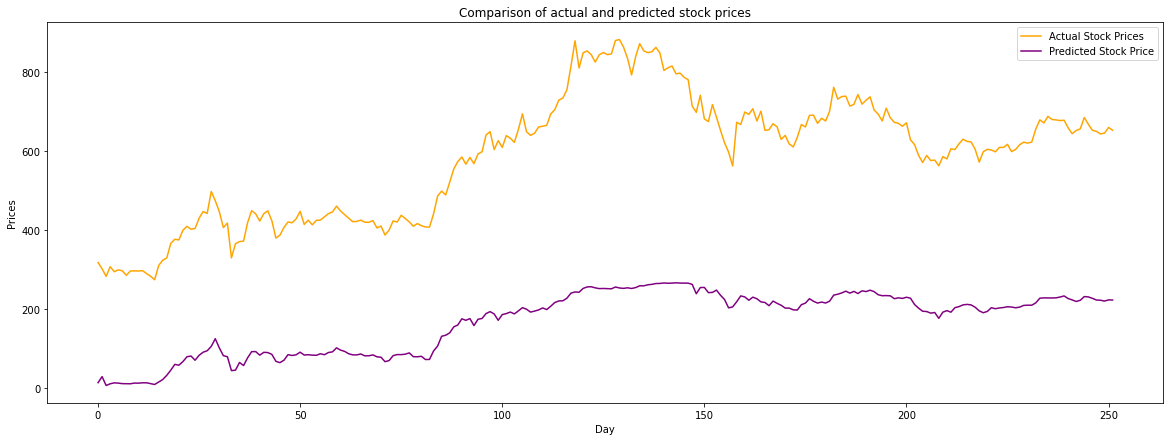

In [49]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='purple',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# XGBoost Model

In [50]:
XGB=XGBRegressor()
XGB= XGB.fit(X_train, y_train)
XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation Measures on Test data

# R2

In [51]:
y_pred_test = XGB.predict(X_test)
xgb_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(xgb_test_rs,3))

R Squared :  -6.163


# MSE

In [52]:
XGB_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(XGB_test_mse,3))

Mean Squared Error:  176411.905


# MAE

In [53]:
XGB_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(XGB_test_MAE,3))

Mean Absolute Error:  413.579


# Predictions and Actual Stock Price

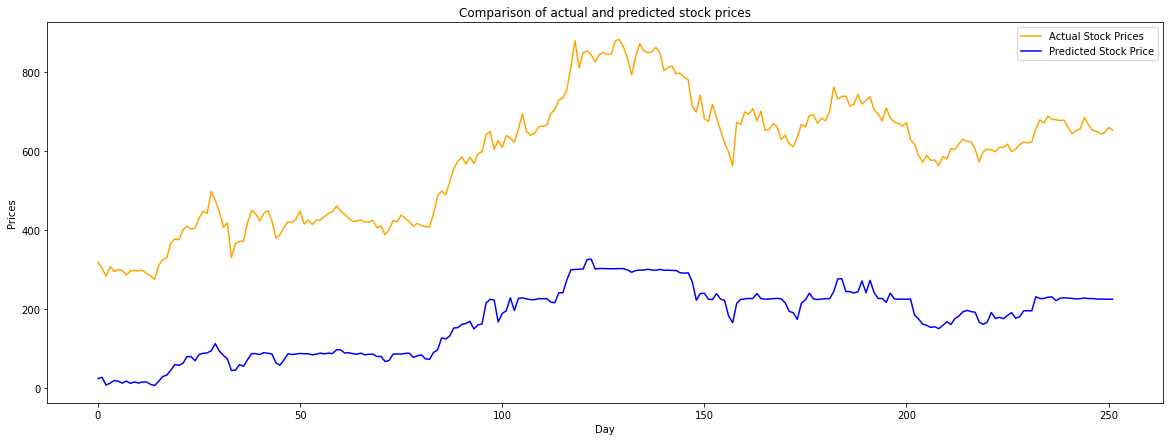

In [54]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='blue',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Ensemble learning Model

In [55]:
RF_1=RandomForestRegressor()
XGB_1=XGBRegressor()

In [56]:
Hyib = VotingRegressor( estimators= [('RF',RF_1),('XGB',XGB_1)])
Hyib= Hyib.fit(X_train , y_train)
Hyib

VotingRegressor(estimators=[('RF', RandomForestRegressor()),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          ra

# Evaluation Measures on Test data

# R2

In [57]:
y_pred_test = Hyib.predict(X_test)
Hyib_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(Hyib_test_rs,3))

R Squared :  -6.255


# MSE

In [58]:
Hyib_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(Hyib_test_mse,3))

Mean Squared Error:  178666.02


# MAE

In [59]:
Hyib_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(Hyib_test_MAE,3))

Mean Absolute Error:  415.424


# Predictions and Actual Stock Price

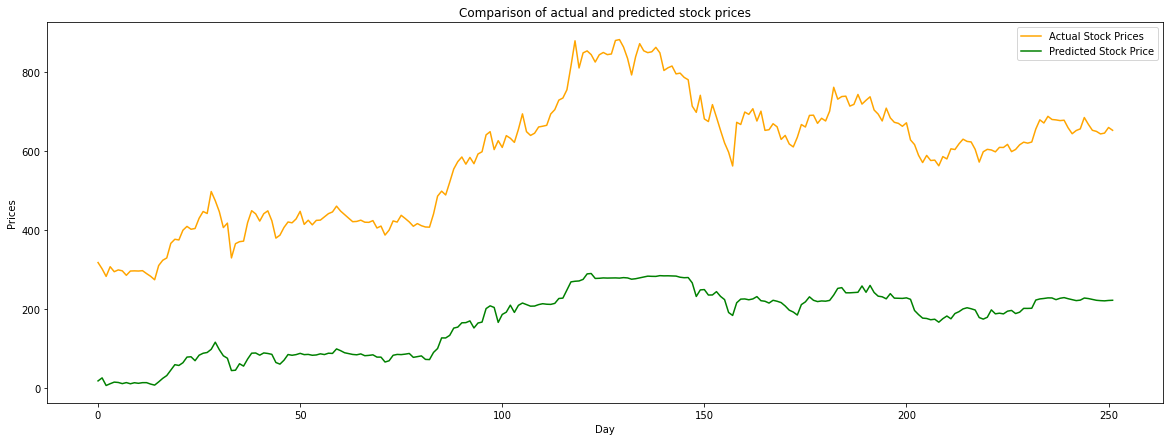

In [60]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='green',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# RNN Model

# ------------------------------------------------------------------------------------------------------

In [61]:
def RNN_model():
    RNN = Sequential()
    RNN.add(Dense(64,input_shape=(31,)))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(64))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(1))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    return RNN
RNN_model=RNN_model()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2048      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [62]:
RNN_model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 3593.3418
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 3176.1135
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 2276.5012
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1431.1096
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1504.3549
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 1609.1039
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1216.9304
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1203.1237
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1292.2451
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1161.0063
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 972.3867
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 922.7063
Epoch 13/100
3/3 [=========

### R2

In [63]:
y_pred_test = RNN_model.predict(X_test)
RNN_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(RNN_test_rs,3))

R Squared :  -7.808


### MSE

In [64]:
RNN_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(RNN_test_mse,3))

Mean Squared Error:  216919.515


### MAE

In [65]:
RNN_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(RNN_test_MAE,3))

Mean Absolute Error:  456.022


# Predictions and Actual Stock Price

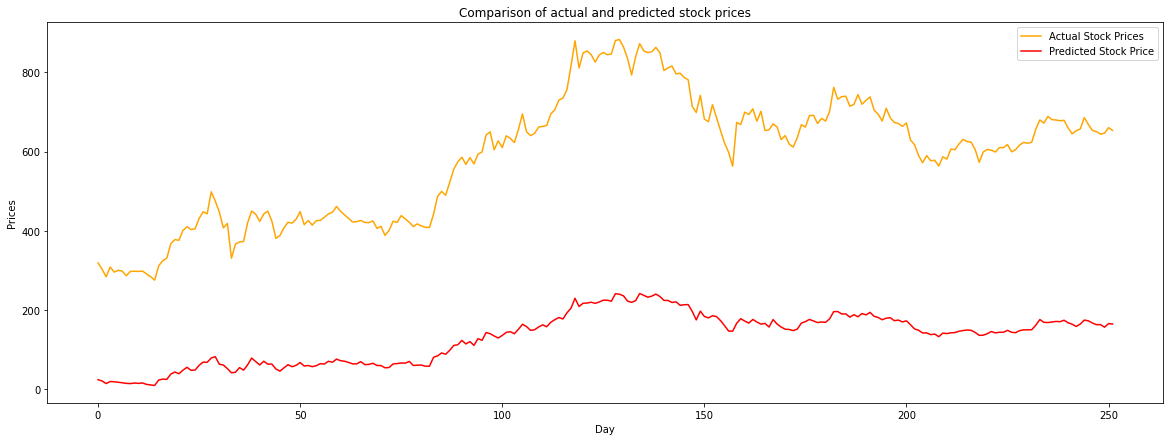

In [66]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='red',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results on R2 score

In [67]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "R2 Score"]


x.add_row(["Random Forest Algorithm", round(rf_test_rs,3)])
x.add_row(["XGB Algorithm",  round(xgb_test_rs,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_rs,3)])
x.add_row(["Neural Network Model", round(RNN_test_rs,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+----------+
|            Model            | R2 Score |
+-----------------------------+----------+
|   Random Forest Algorithm   |  -6.341  |
|        XGB Algorithm        |  -6.163  |
| Ensemble Learning Algorithm |  -6.255  |
|     Neural Network Model    |  -7.808  |
+-----------------------------+----------+




# Comparison of all algorithms Results on MSE score

In [68]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MSE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_mse,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_mse,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_mse,3)])
x.add_row(["Neural Network Model", round(RNN_test_mse,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+------------+
|            Model            | MSE score  |
+-----------------------------+------------+
|   Random Forest Algorithm   | 180791.792 |
|        XGB Algorithm        | 176411.905 |
| Ensemble Learning Algorithm | 178666.02  |
|     Neural Network Model    | 216919.515 |
+-----------------------------+------------+




# Comparison of all algorithms Results on MAE score

In [69]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MAE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_MAE,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_MAE,3)])
x.add_row(["Ensemble Learning Model",  round(Hyib_test_MAE,3)])
x.add_row(["Neural Network Model", round(RNN_test_MAE,3)])

print(x)
print('\n')



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
| Random Forest Algorithm |   416.77  |
|      XGB Algorithm      |  413.579  |
| Ensemble Learning Model |  415.424  |
|   Neural Network Model  |  456.022  |
+-------------------------+-----------+




# Graph of MSE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

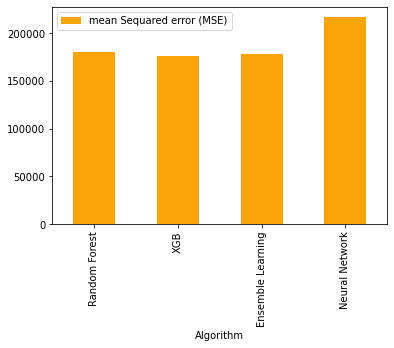

In [70]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'mean Sequared error (MSE)': [rf_test_mse]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean Sequared error (MSE)': [XGB_test_mse]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean Sequared error (MSE)': [Hyib_test_mse]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean Sequared error (MSE)': [RNN_test_mse]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of R2 of each algorithm

<AxesSubplot:xlabel='Algorithm'>

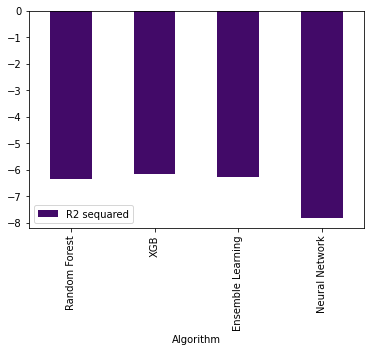

In [71]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'R2 sequared': [rf_test_rs]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'R2 sequared': [xgb_test_rs]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'R2 sequared': [Hyib_test_rs]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'R2 sequared': [RNN_test_rs]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of MAE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

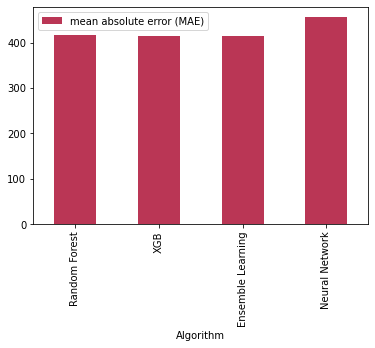

In [72]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'],'mean absolute error (MAE)': [rf_test_MAE]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean absolute error (MAE)': [XGB_test_MAE]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean absolute error (MAE)': [Hyib_test_MAE]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean absolute error (MAE)': [RNN_test_MAE]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# Time-Series Analysis per Store Type

### Seasonality of Close price

<AxesSubplot:xlabel='Date'>

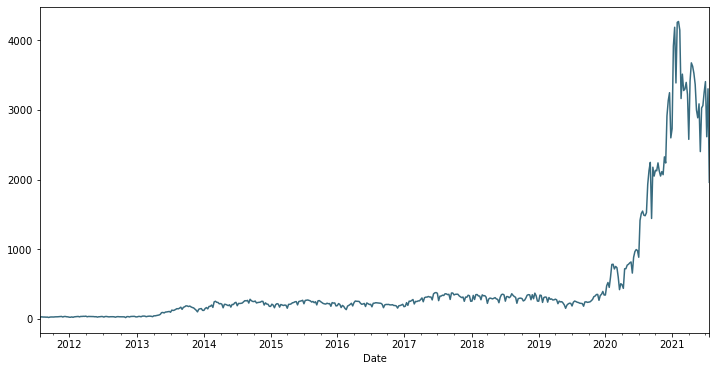

In [73]:
data['Close'] = data['Close'] * 1.0
close_1 = data['Close']
f, (ax1) = plt.subplots(1, figsize = (12, 6))
c = '#386B7F'
close_1.resample('W').sum().plot(color = c, ax = ax1)

### Stationarize the Close price data

In [74]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [75]:
def residual_plot(model):
    resid = model.resid
    print(normaltest(resid))
    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)
    sns.distplot(resid ,fit = stats.norm, ax = ax0)
    (mu, sigma) = stats.norm.fit(resid)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

### Close price with rolling windows

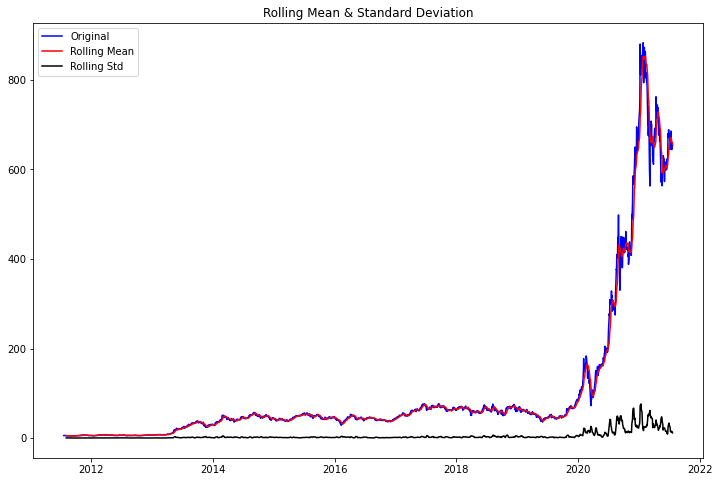

Results of Dickey-Fuller Test:
p-value = 0.9942. The series is likely non-stationary.
Test Statistic                    0.989180
p-value                           0.994150
#Lags Used                       19.000000
Number of Observations Used    2497.000000
Critical Value (1%)              -3.432972
Critical Value (5%)              -2.862698
Critical Value (10%)             -2.567387
dtype: float64


In [76]:
test_stationarity(close_1)

We are going to make data as stationary. So we want to do is take a first difference of the data and it will help to eliminate the overall trend from the data.

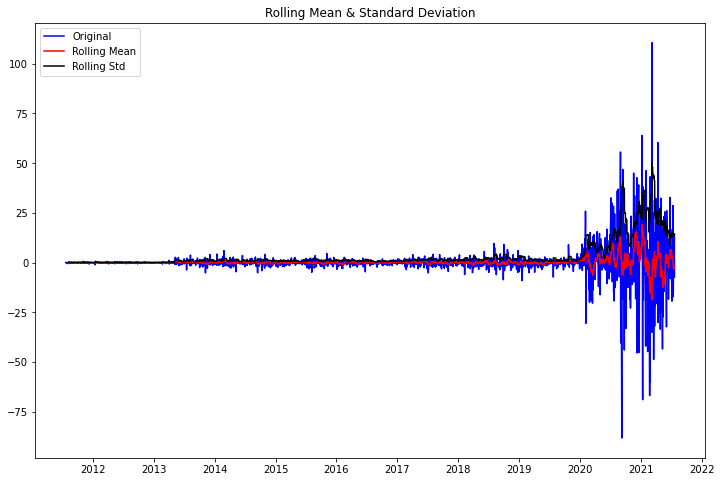

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.720673e+00
p-value                        9.562913e-17
#Lags Used                     2.000000e+01
Number of Observations Used    2.495000e+03
Critical Value (1%)           -3.432974e+00
Critical Value (5%)           -2.862699e+00
Critical Value (10%)          -2.567387e+00
dtype: float64


In [77]:
first_diff_a = close_1 - close_1.shift(1)
first_diff_a = first_diff_a.dropna(inplace = False)
test_stationarity(first_diff_a, window = 12)

### Plots of ACF and PACF

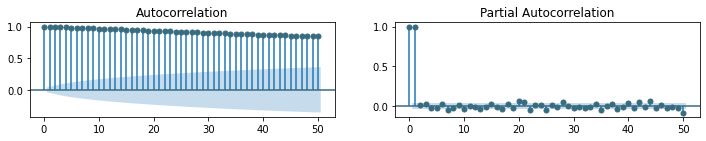

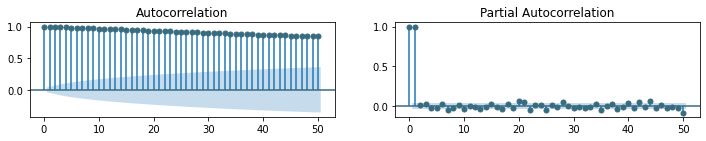

In [78]:
plt.figure(figsize = (12, 8))
plt.subplot(421); plot_acf(close_1, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(close_1, lags = 50, ax = plt.gca(), color = c)

### Sarima Model

In [79]:
arima_mod = sm.tsa.ARIMA(close_1, (11,1,0)).fit(disp=False)
print(arima_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2516
Model:                ARIMA(11, 1, 0)   Log Likelihood               -8726.400
Method:                       css-mle   S.D. of innovations              7.763
Date:                Wed, 21 Jul 2021   AIC                          17478.801
Time:                        22:16:56   BIC                          17554.596
Sample:                             1   HQIC                         17506.309
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2578      0.176      1.467      0.142      -0.087       0.602
ar.L1.D.Close     -0.0766      0.020     -3.845      0.000      -0.116      -0.038
ar.L2.D.Close     -0.0068      0.020

NormaltestResult(statistic=970.0147350214966, pvalue=2.311940259120148e-211)


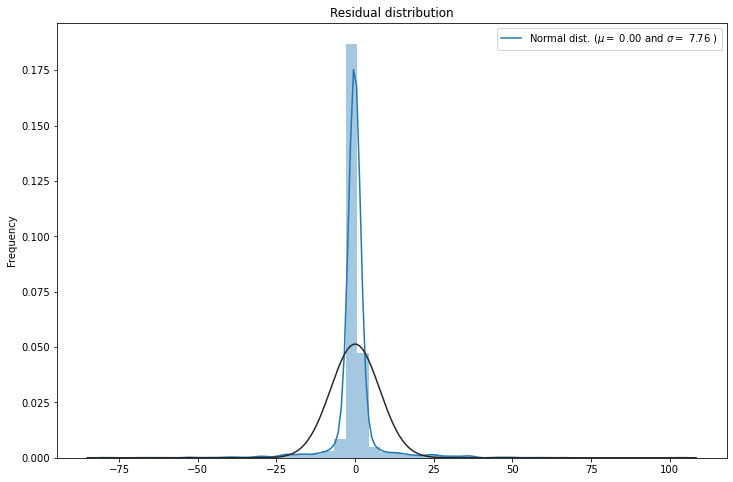

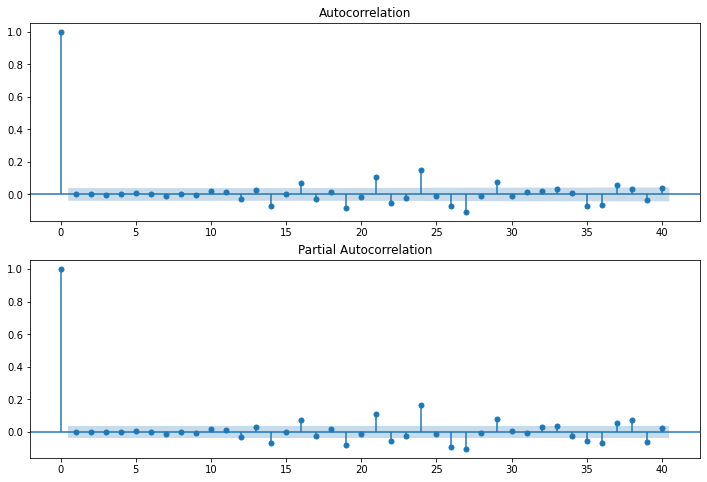

In [80]:
residual_plot(arima_mod)

### SARIMA Model

In [81]:
sarima_mod = sm.tsa.statespace.SARIMAX(close_1, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2517
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -8977.179
Date:                             Wed, 21 Jul 2021   AIC                          17982.359
Time:                                     22:17:28   BIC                          18063.918
Sample:                                          0   HQIC                         18011.966
                                            - 2517                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0630      0.006     -9.922      0.000      -0.075      -0.051
ar.L2          0.0360      

NormaltestResult(statistic=712.4135722983656, pvalue=2.0015127404763297e-155)


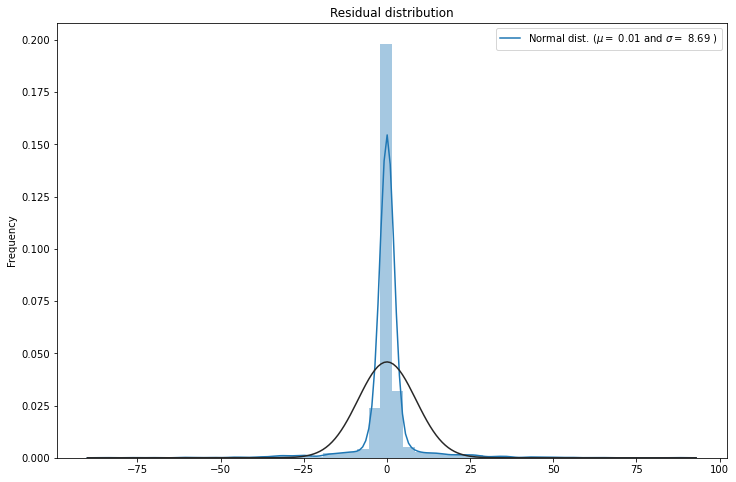

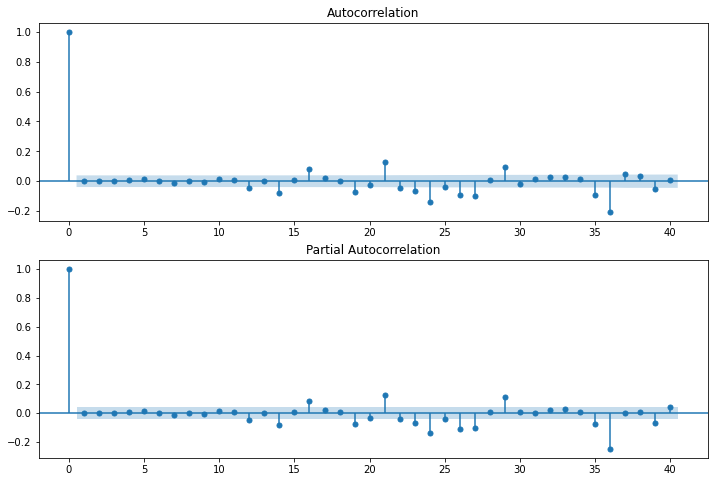

In [82]:
residual_plot(sarima_mod)

# In progress . . . 